In [36]:
import os
import glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [26]:

parent_dir = '/home/brysongray/dti_validate/outputs/odf_to_cdf_outputs'
files = glob.glob(parent_dir+'/*')
files.sort()

In [51]:
nii = nib.load(files[1023])
img = nii.get_fdata().transpose()
img.shape
print(np.max(img))

0.0


In [31]:
size = 128*256*256
cdf = np.zeros((size, 64))
for i,f in enumerate(files):
    nii = nib.load(f)
    data = nii.get_fdata().transpose()
    start = 4096*i
    stop = start + 4096
    cdf[start:stop] = data


In [33]:
cdf = cdf.reshape((128,256,256,64))

In [34]:
cdf.shape

(128, 256, 256, 64)

In [35]:
out = os.path.join(parent_dir, 'odf_to_cdf.nii.gz')
cdf_nii = nib.Nifti1Image(cdf, affine=np.eye(4))
nib.save(cdf_nii, out)

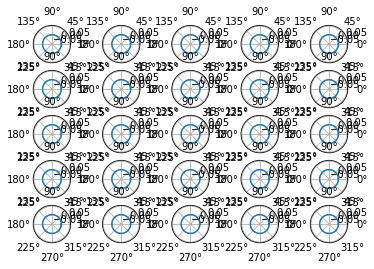

In [40]:
Ntheta = 63
t = np.arange(Ntheta+1)/Ntheta*2.0*np.pi
fig, axs = plt.subplots(nrows=5, ncols=5, subplot_kw={'projection':'polar'})
for i in range(5):
    for j in range(5):
        axs[i][j].plot(t,cdf[64,128,160+i])


In [42]:
np.max(cdf)

0.0